In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Vamos a empezar con el EDA:


Revisamos las dimensiones del conjunto de datos utilizando la propiedad shape del DataFrame.
Tiene 7 columnas y 1338 filas.

In [4]:
df.shape

(1338, 7)

Revisar los nombres de las columnas del DataFrame utilizando la propiedad columns.

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Verificamos si hay valores nulos en el conjunto de datos utilizando el método isnull() y sum() en el DataFrame.

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Realizar una descripción estadística básica del conjunto de datos utilizando el método describe() del DataFrame para obtener información como la media, la mediana y la desviación estándar de cada columna.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Visualizamos la distribución de cada variable numérica utilizando un histograma.

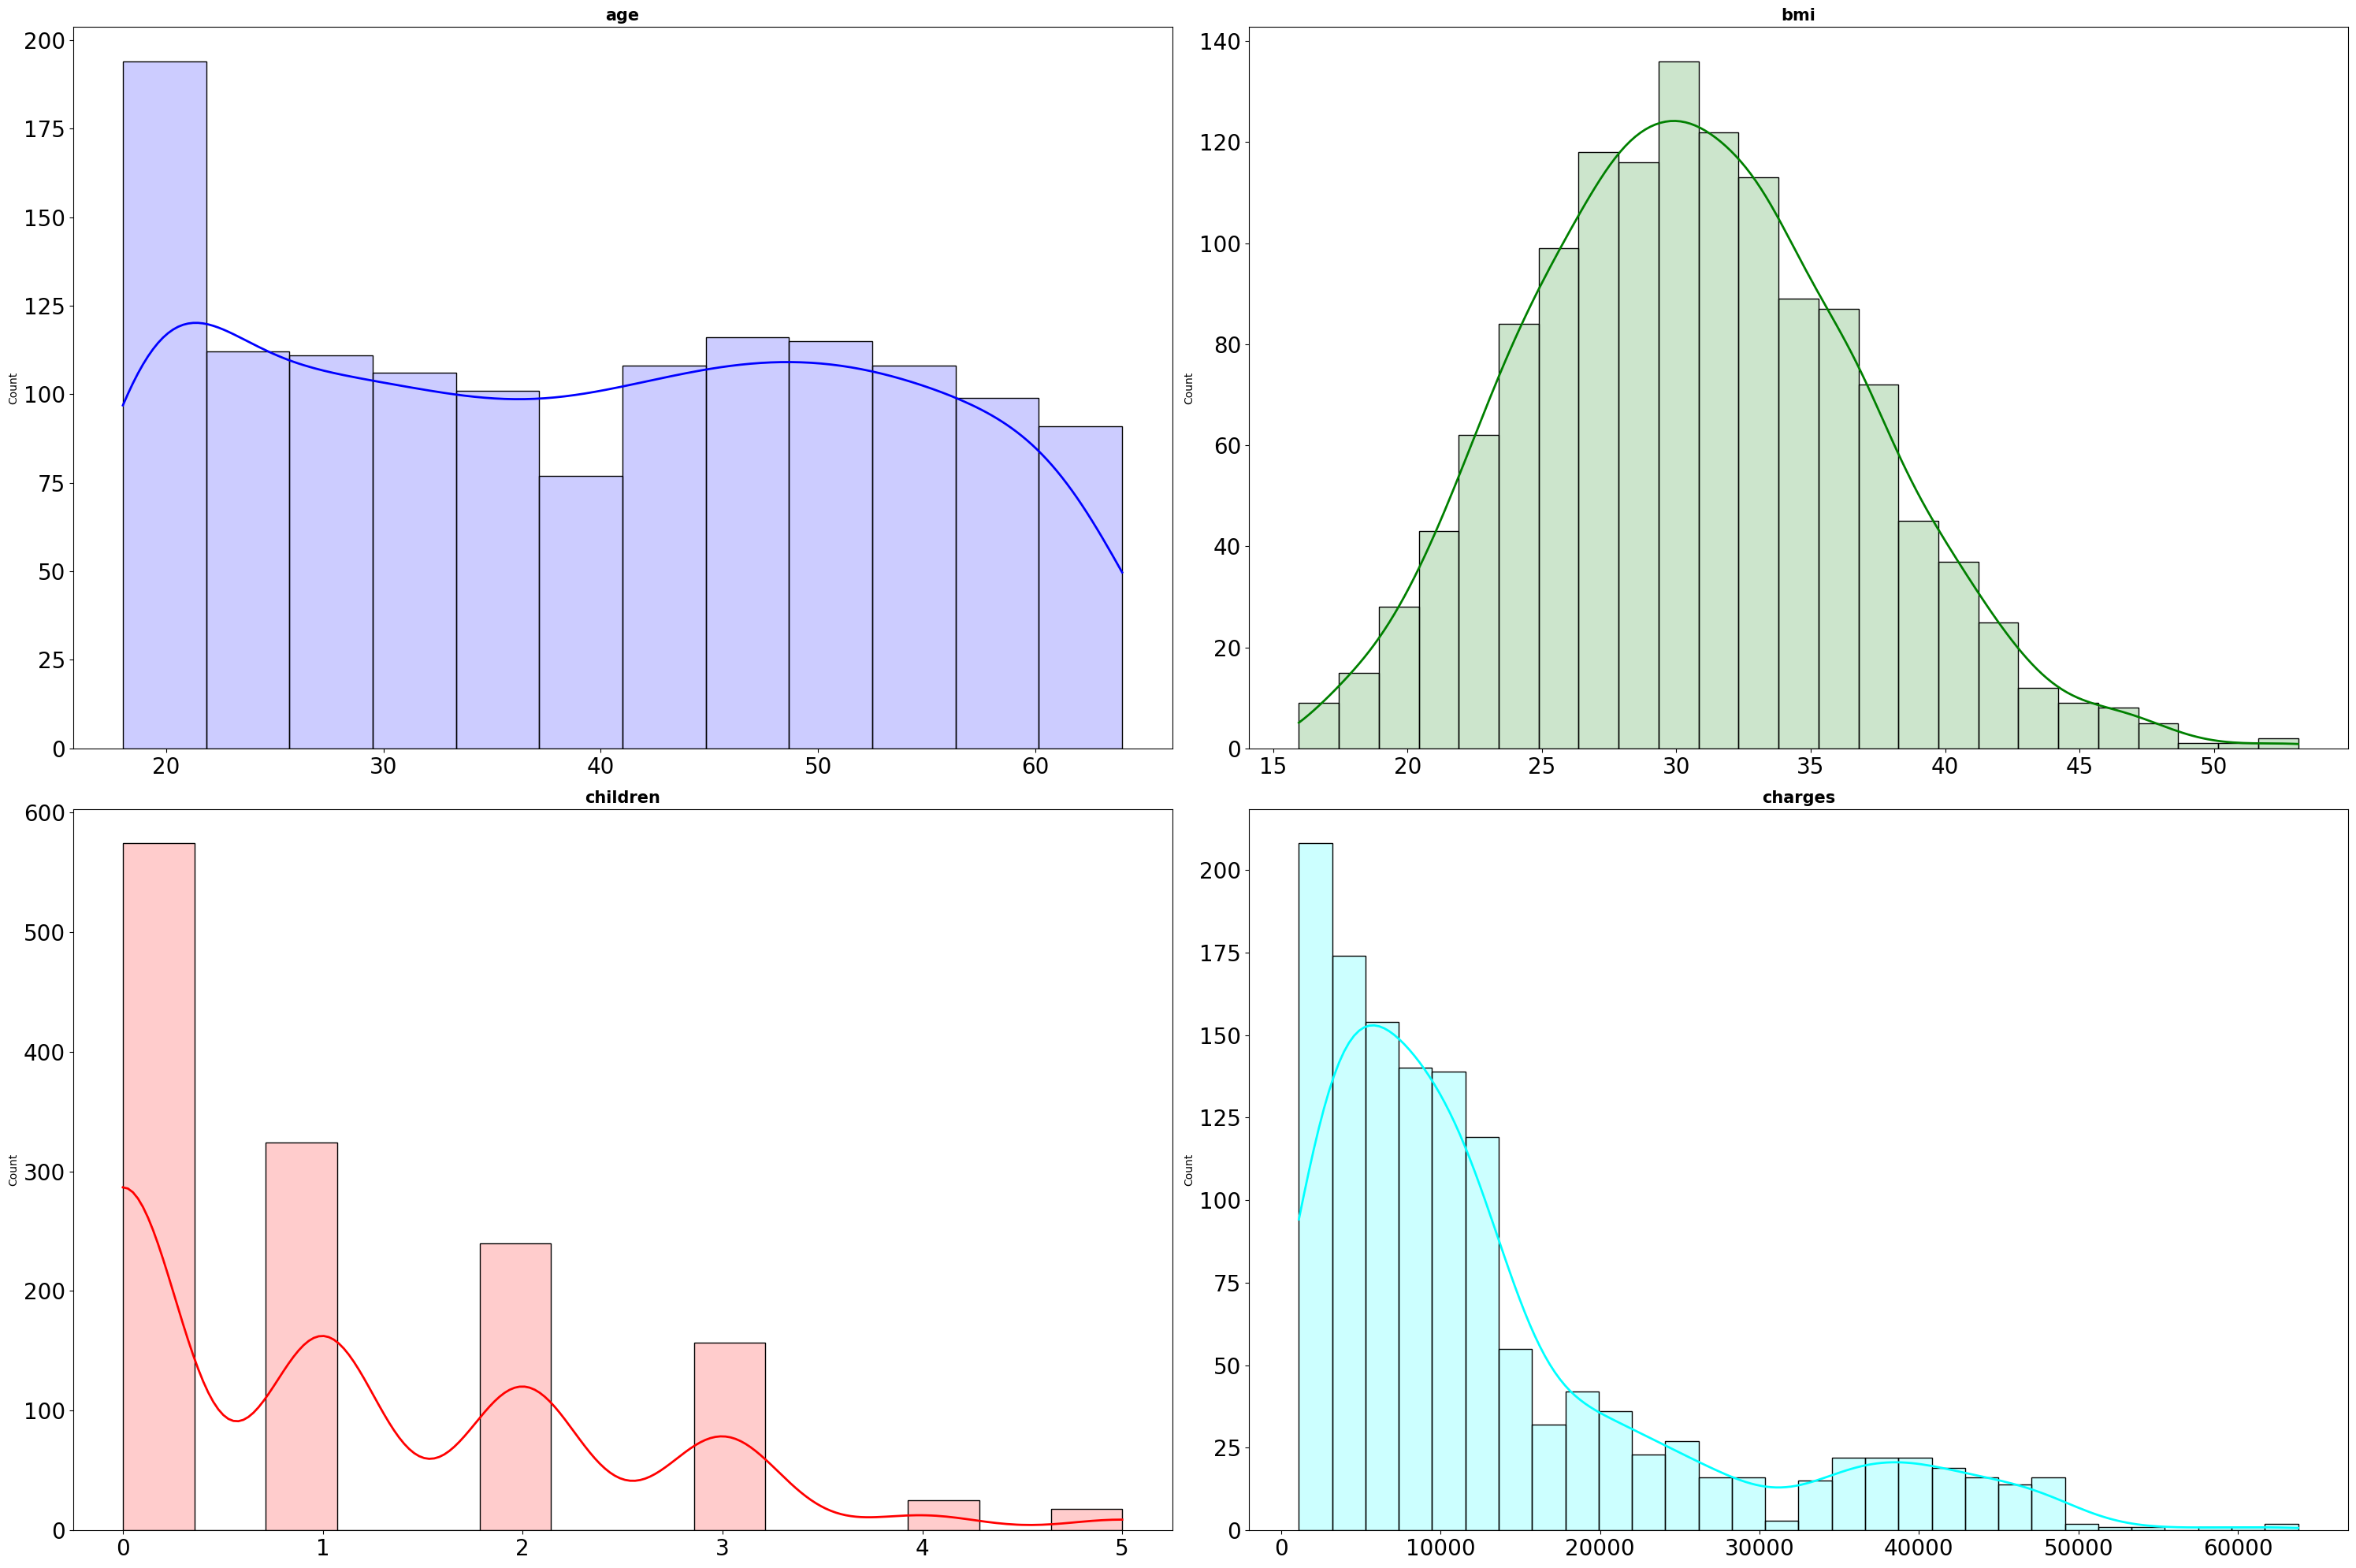

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 20))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

Vemos que ninguno tiene una distribución normal.
Los cargos tienen una distribución sesgada a la derecha lo que significa que tiene valores atípicos en el extremo superior.
Luego veremos si es posible normalizar alguna de las columnas para hacer una regresión lineal o no.

Vamos a visualizar la relacioón que tiene el precio con las otras variables numéricas

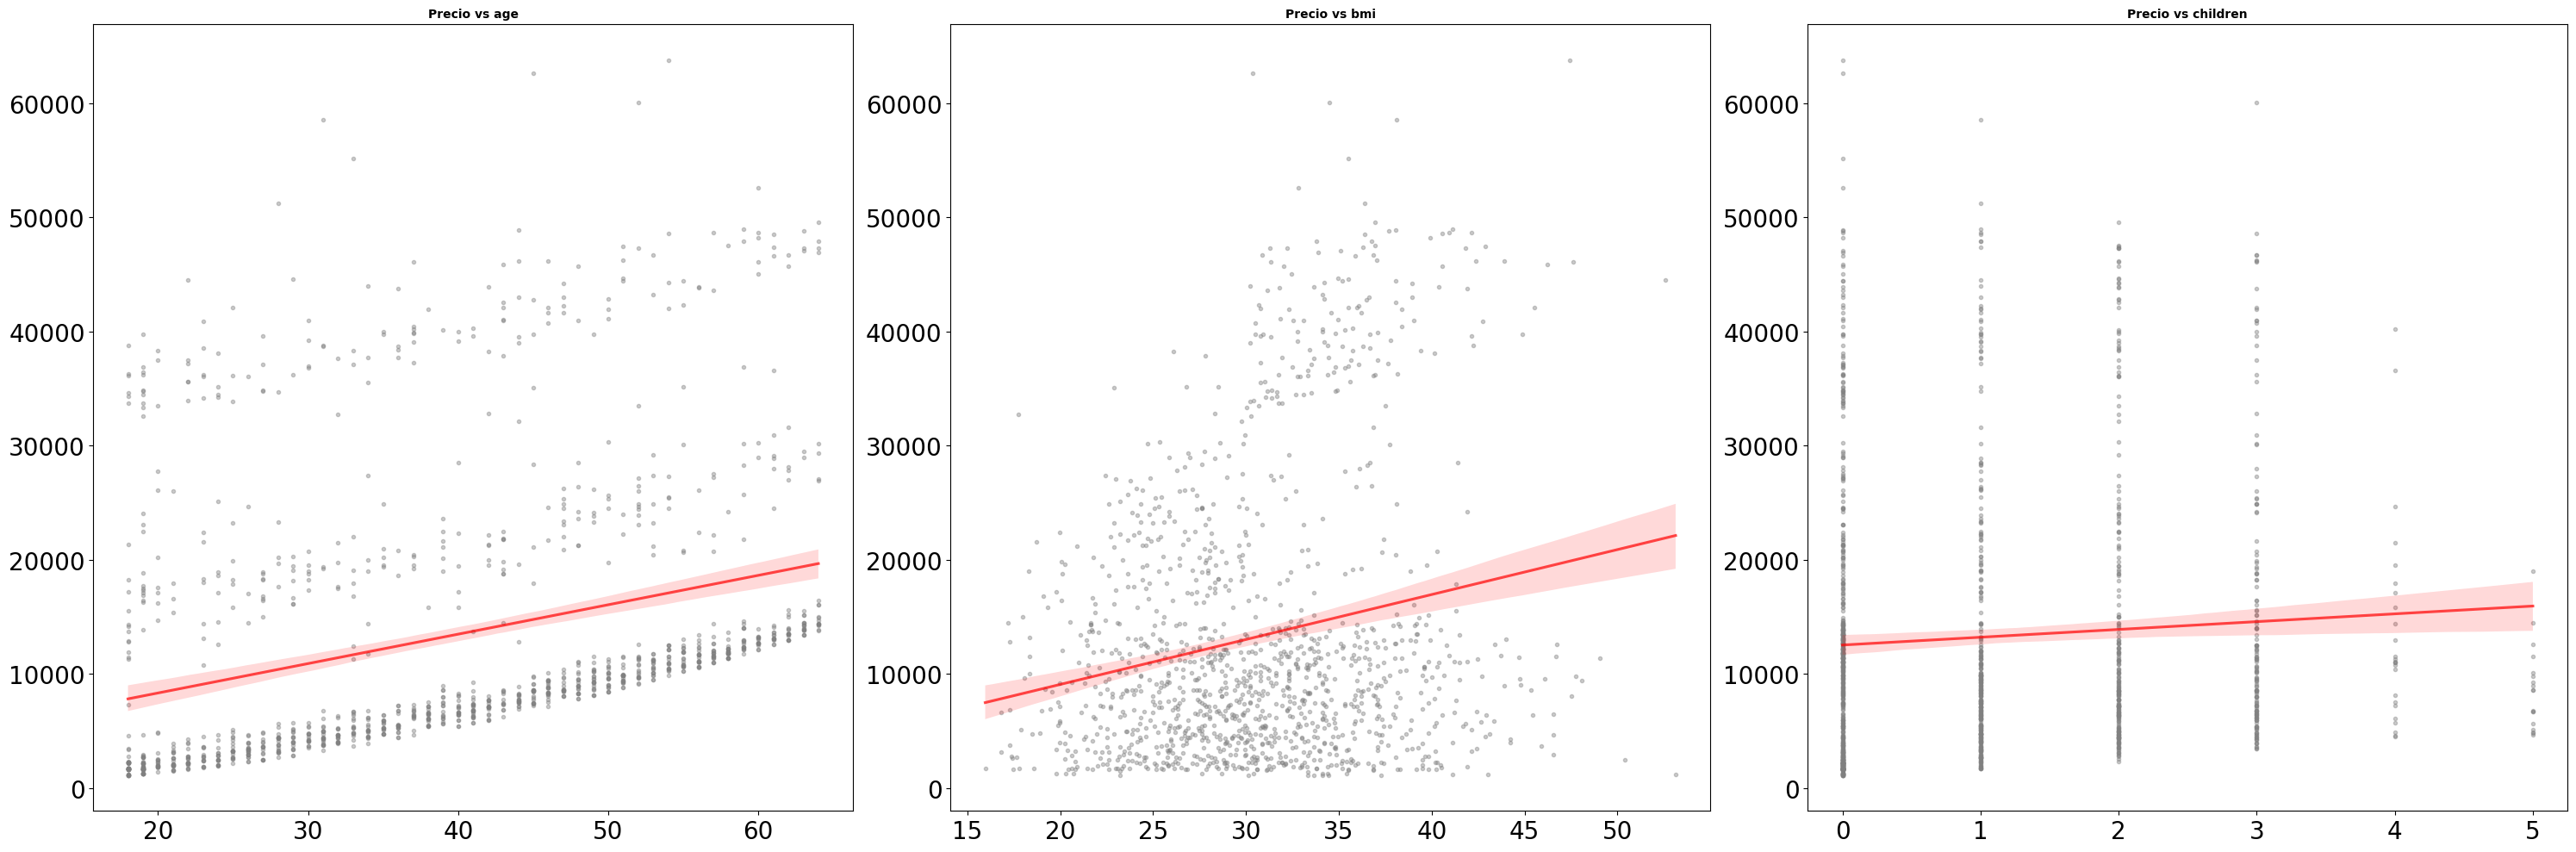

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

El grado de inclinación de la línea de regresión indica la fuerza de la relación entre las variables. Si la línea de regresión tiene una pendiente positiva, significa que hay una relación positiva entre las variables; si la línea de regresión tiene una pendiente negativa, significa que hay una relación negativa entre las variables.

En este caso vemos que todas tienen una relación positiva, siendo "children" la que menos relación parece tener.

Vamos a usar un pairplot para visualizar las relaciones entre las variables y para explorar patrones en los datos. En particular, el pairplot es útil para explorar cómo las variables se relacionan entre sí y para identificar cualquier patrón interesante en los datos.

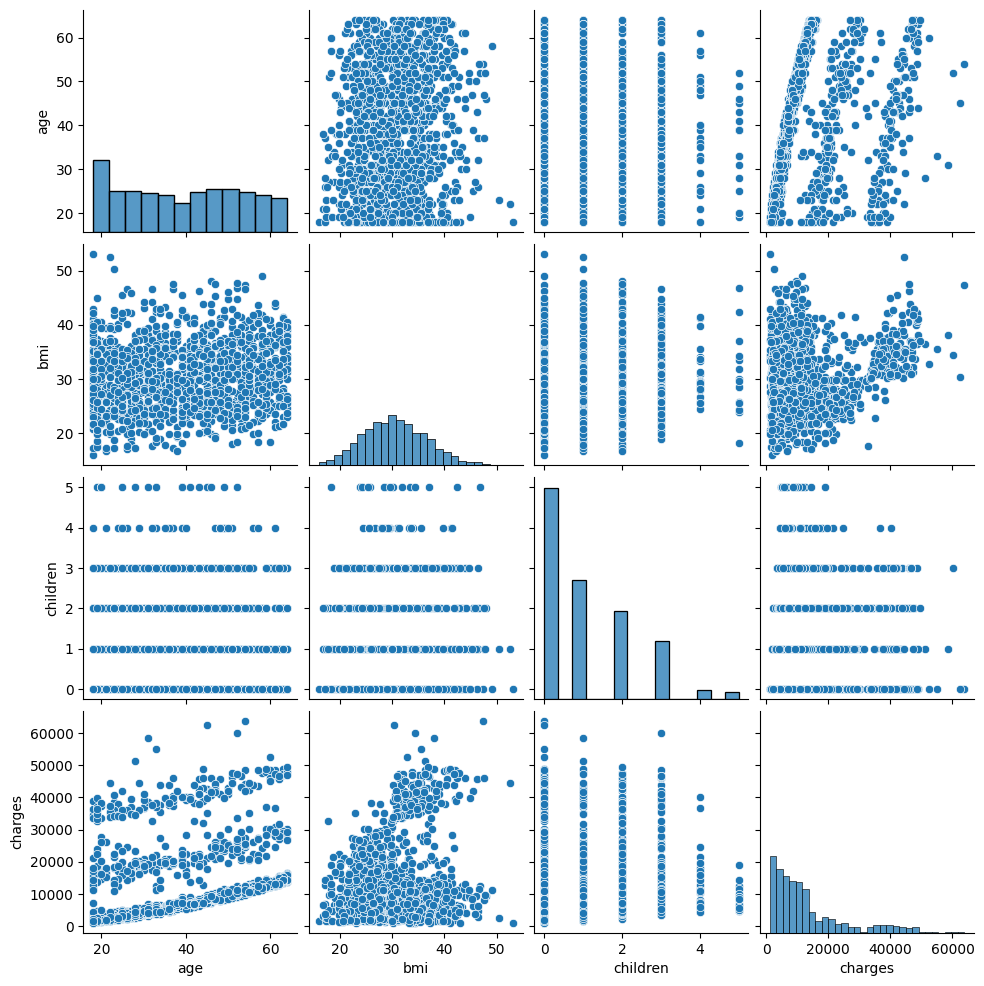

In [10]:
sns.pairplot(data=df);
#no se como leer estos gráficos

Para ver la relación de una manera numérica y más clara usamos un heatmap que representa la correlación de Pearson: se representa por un coeficiente de correlación r que varía entre -1 y 1. Un valor de r de 1 indica una correlación positiva perfecta, lo que significa que las dos variables se mueven en la misma dirección en una relación lineal perfecta. Un valor de r de -1 indica una correlación negativa perfecta, lo que significa que las dos variables se mueven en direcciones opuestas en una relación lineal perfecta. Un valor de r de 0 indica que no hay correlación lineal entre las dos variables.

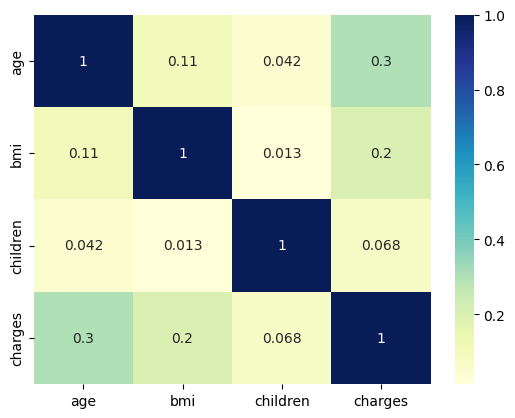

In [11]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

Aquí vemos más claramente que la edad tiene mas relación con los cargos que las otras variables.
Vamos a visualizarlo en triángulo para que sea más claro aún.

In [12]:
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

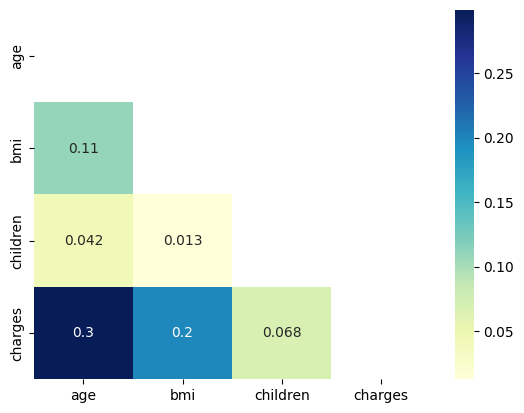

In [13]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

Ahora vamos a visualizar las variables no numéricas.

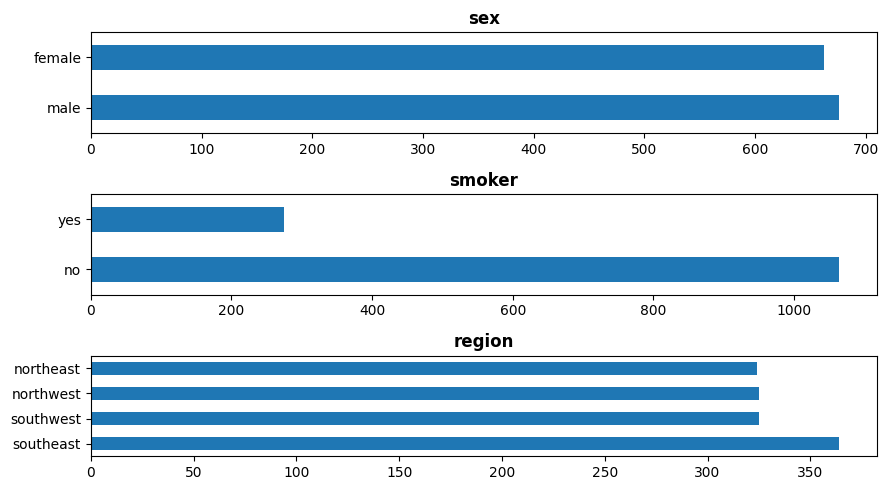

In [14]:
fig, axes = plt.subplots(3, 1, figsize = (9,5))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

Vamos a analizar la relacion entre estas variables y los cargos con un gráfico de bigote.

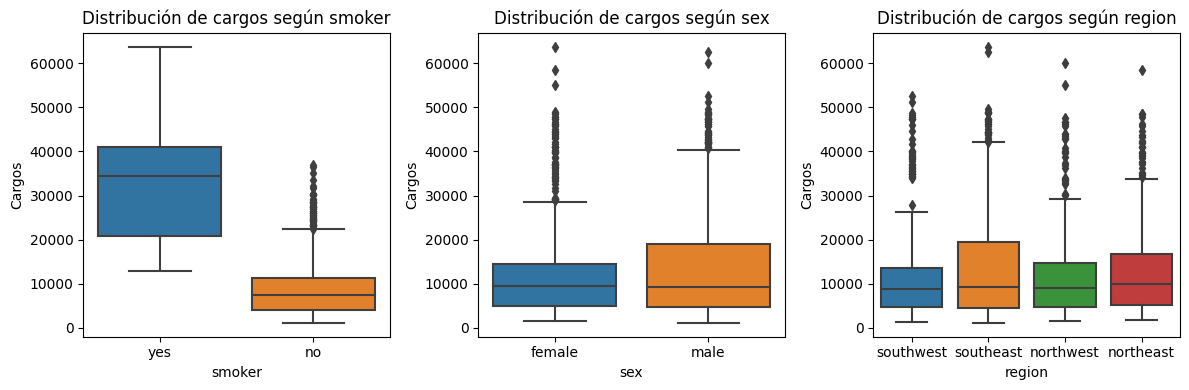

In [15]:
categories = ["smoker", "sex", "region"]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, category in enumerate(categories):
    sns.boxplot(x=category, y="charges", data=df, ax=axes[i])
    axes[i].set_title("Distribución de cargos según {}".format(category))
    axes[i].set_xlabel(category)
    axes[i].set_ylabel("Cargos")

# Ajustar los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Aquí podemos ver que hay una gran diferencia en la distribución de carga entre fumadores y no fumadores, lo que sugiere una relación entre la variable categórica y la carga.

En sexo también se aprecia aunque no tanto.

Vamos a ver los aoutliers que tenemos

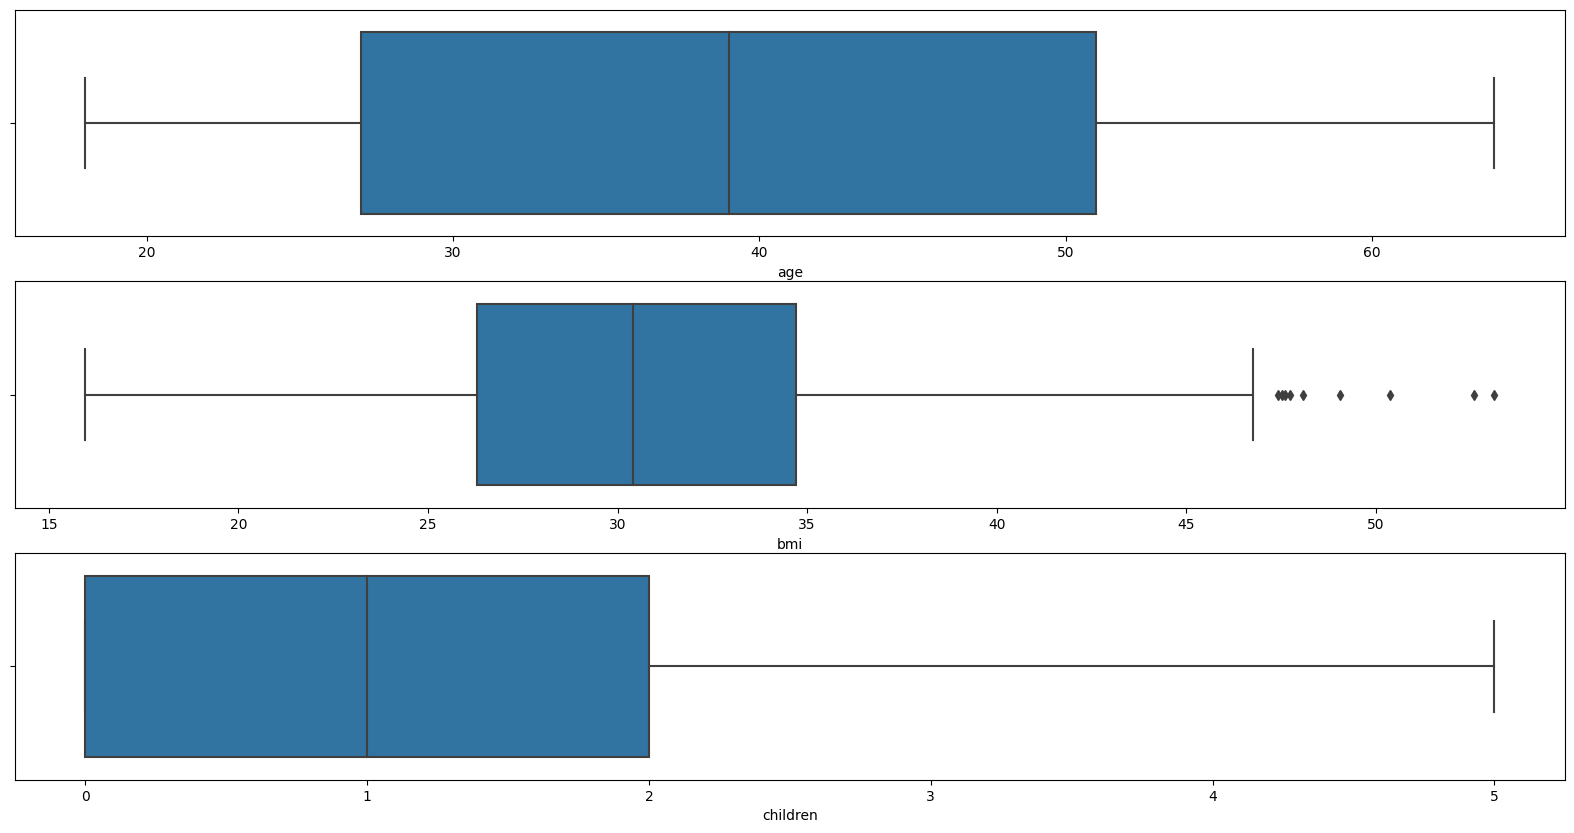

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(20,10))

for i in range(len(columnas_numeric)):
    sns.boxplot(x=columnas_numeric[i], data=df, ax=ax[i])
plt.show()

fig.tight_layout();

In [17]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [18]:
ind = detectar_outliers(columnas_numeric, df)
print(ind)

{'bmi': [116, 286, 401, 543, 847, 860, 1047, 1088, 1317]}


De momento vamos a mantener los outliers ya que pueden ser importantes para el análisis y solo son 9.

Pero vamos a crear otro grupo de datos donde se separen los fumadores de los no fumadores

In [19]:
smoker_group = df.groupby('smoker').get_group('yes')
non_smoker_group = df.groupby('smoker').get_group('no')


Vamos a analizar como se verían los datos en cada uno de los nuevos grupos para ver si los datos se han normalizado algo

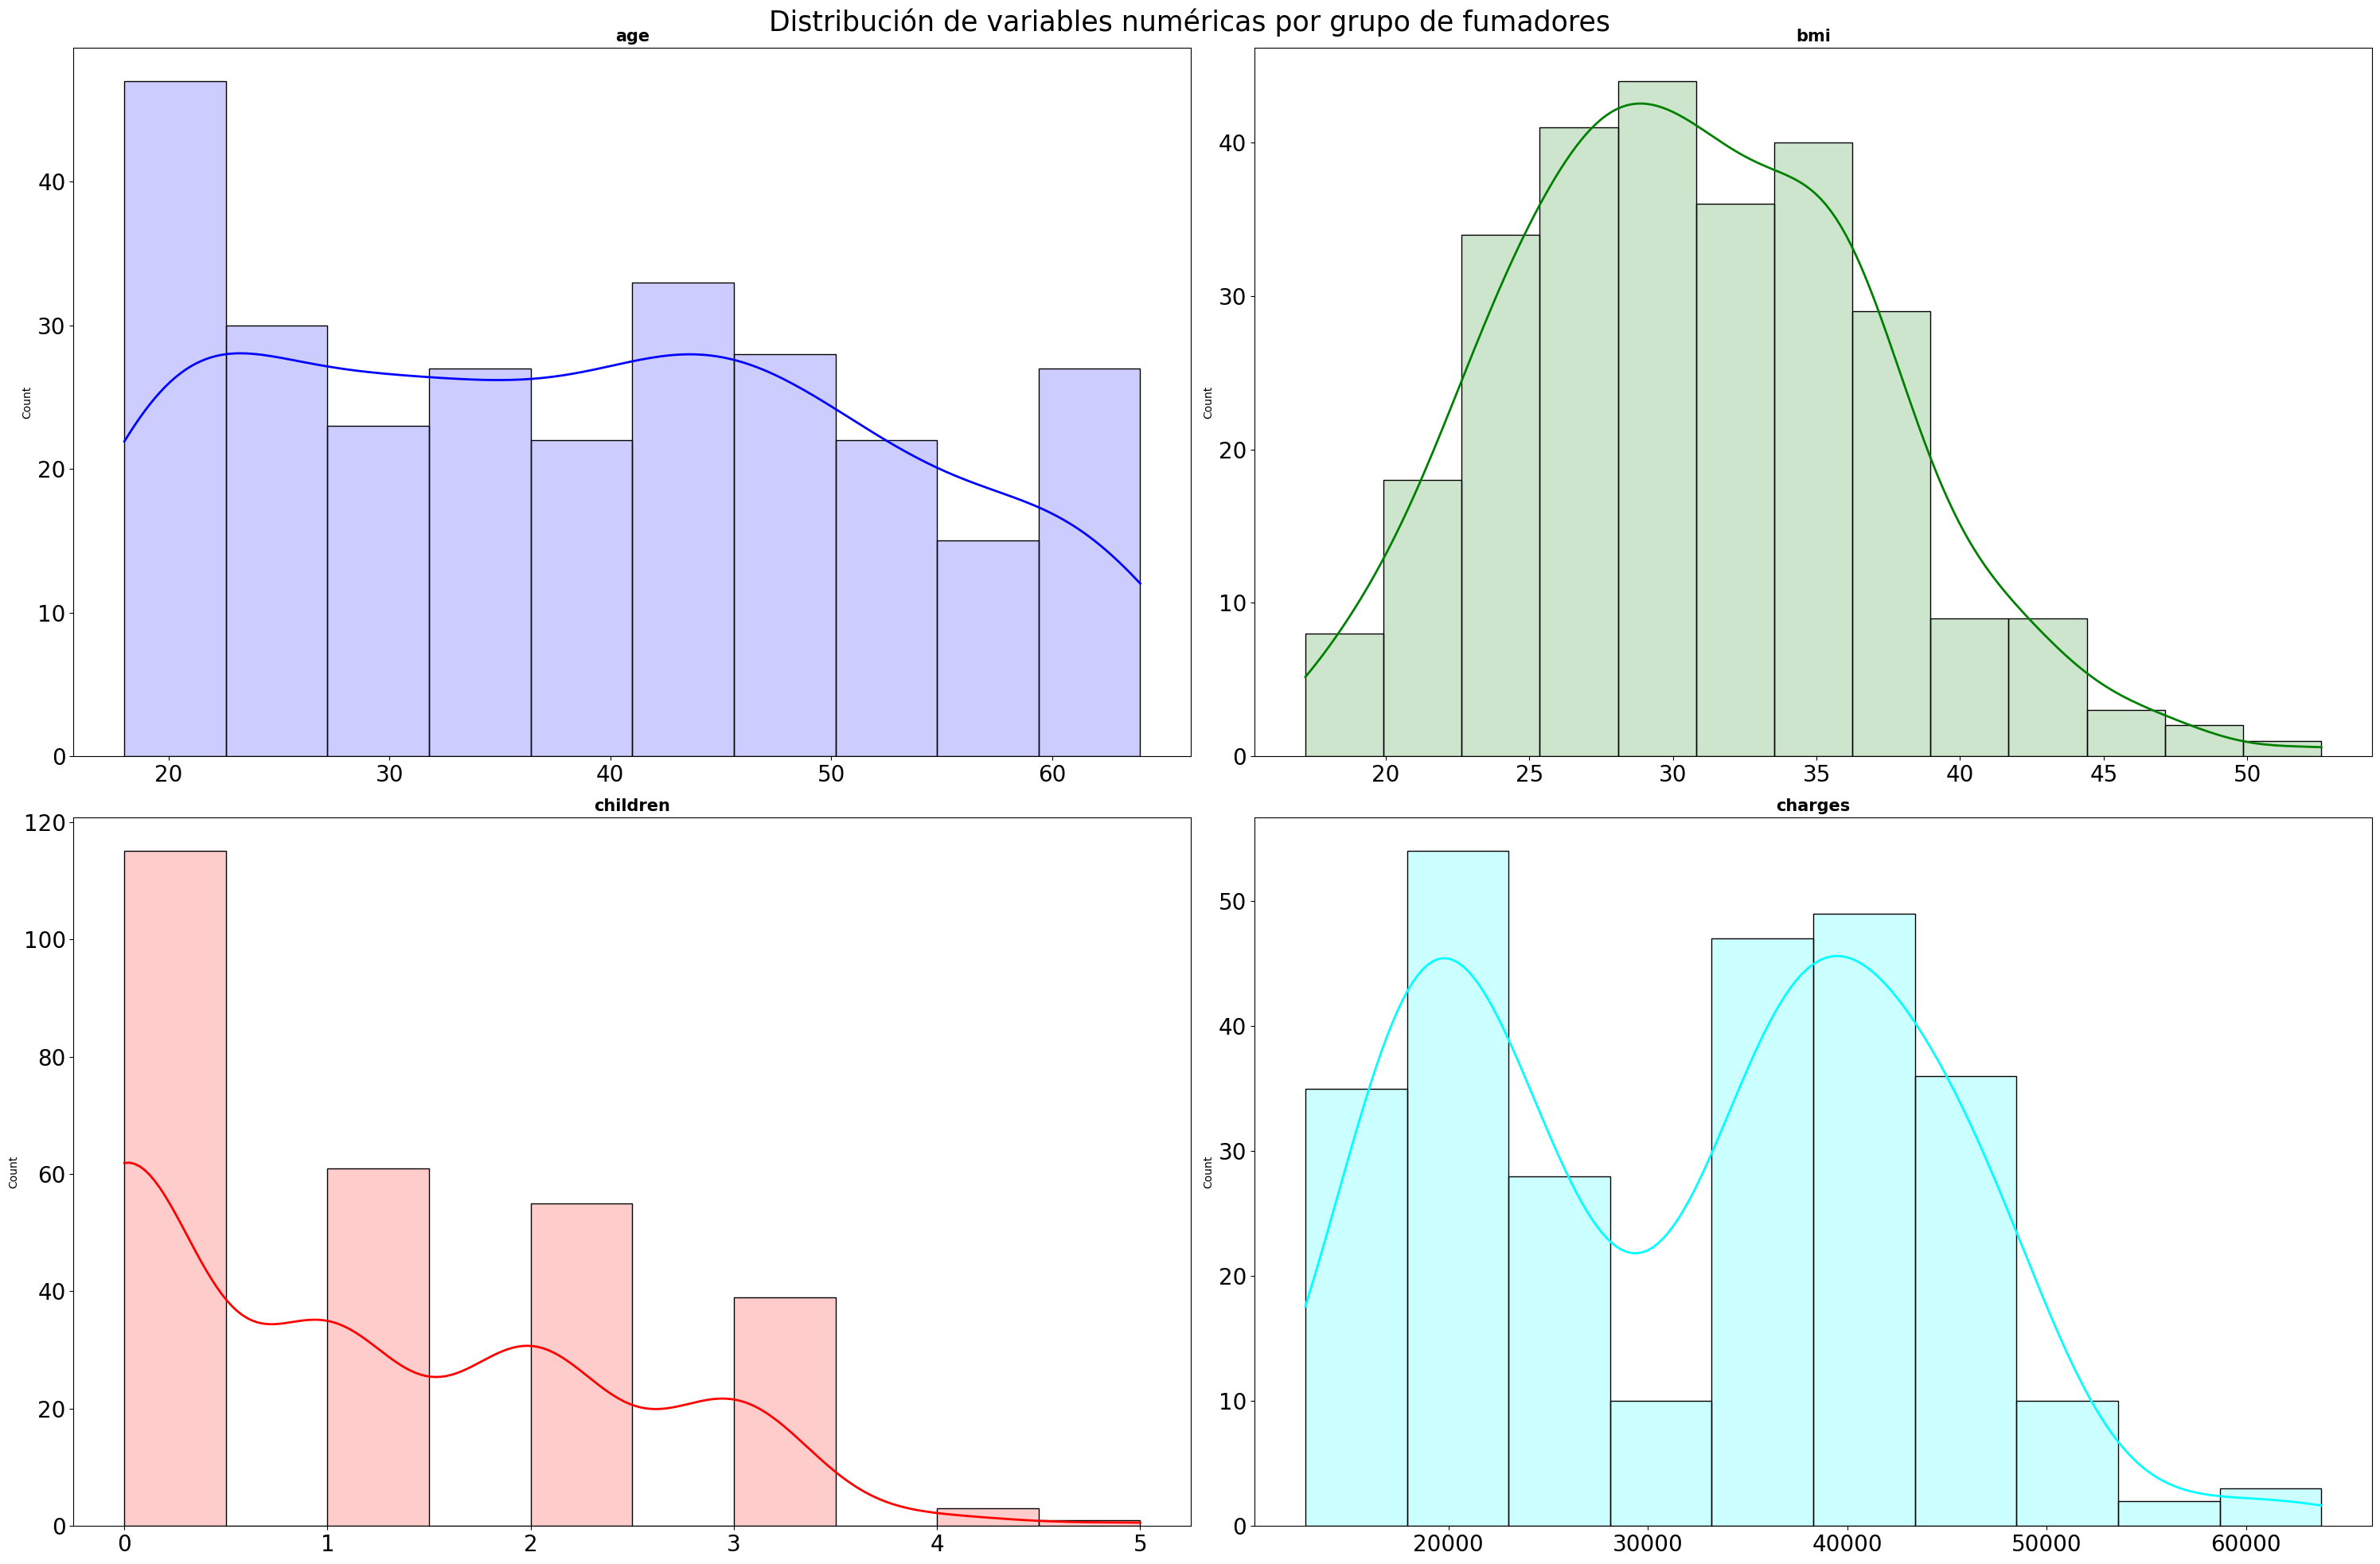

In [20]:

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 20))
fig.suptitle("Distribución de variables numéricas por grupo de fumadores", fontsize=25)

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = smoker_group,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
        
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

    

fig.tight_layout();

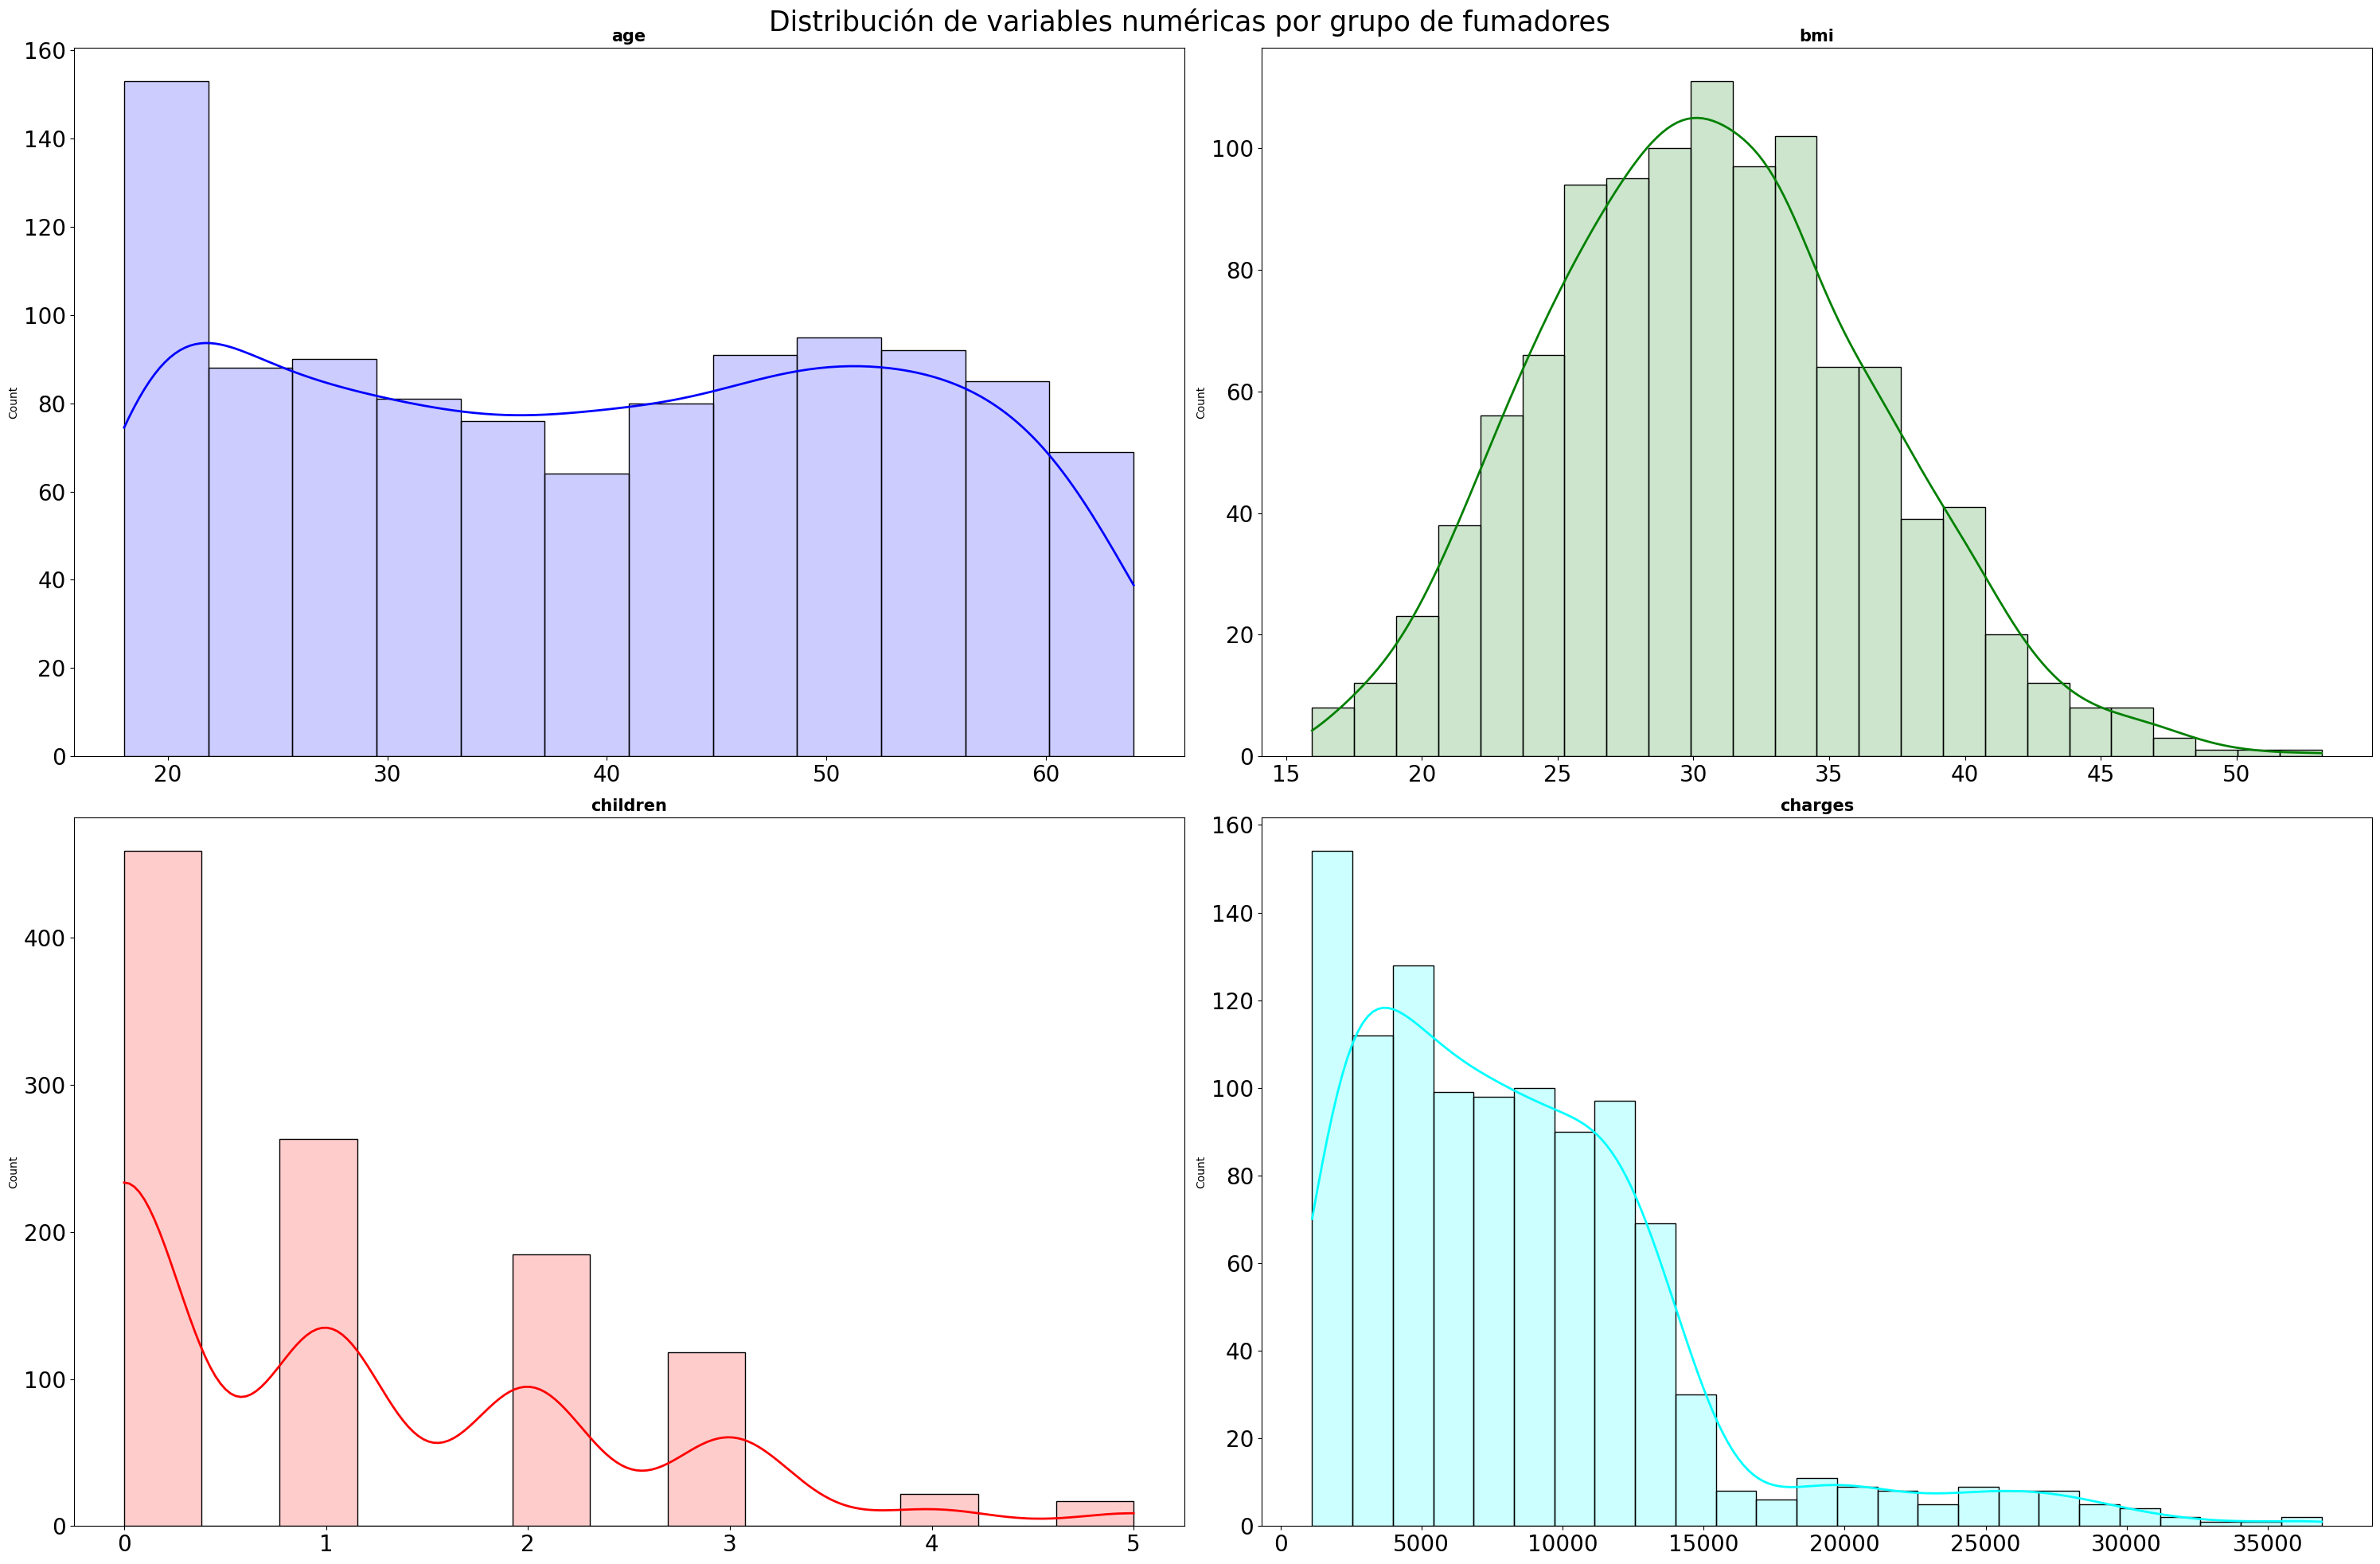

In [21]:

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 20))
fig.suptitle("Distribución de variables numéricas por grupo de fumadores", fontsize=25)

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = non_smoker_group,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
        
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

    

fig.tight_layout();

Sigue sin estar normalizadas. Vamos a usar alguno de los métodos que conocemos, como box.cox

In [22]:
!pip install -U scikit-learn

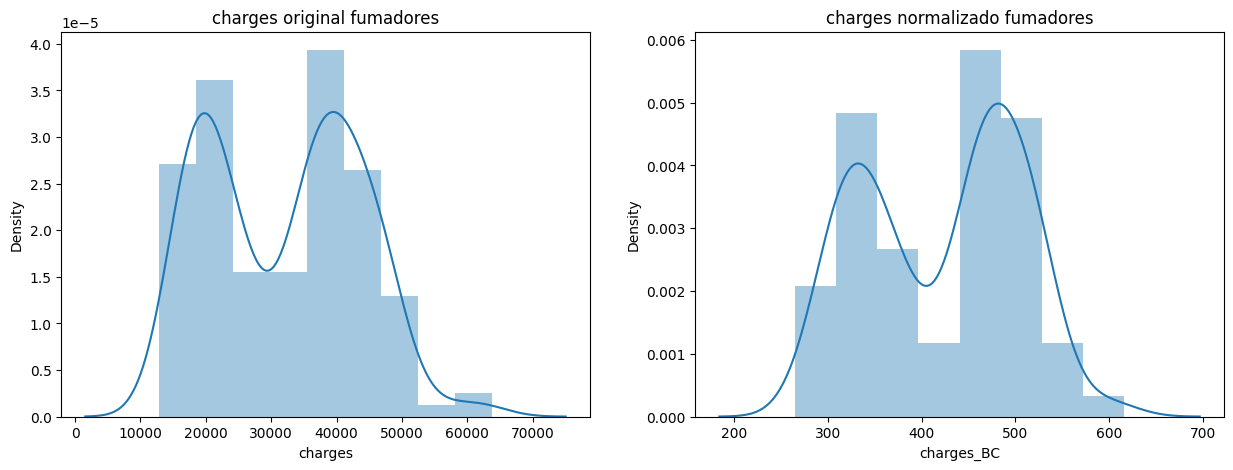

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from scipy import stats

smoker_group['charges_BC'], lambda_ajustada = stats.boxcox(smoker_group['charges'])
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original fumadores')
axes[1].set_title('charges normalizado fumadores')

sns.distplot(smoker_group['charges'] ,ax = axes[0])
sns.distplot(smoker_group['charges_BC'], ax = axes[1]);



In [24]:
smoker_group

,age,sex,bmi,children,smoker,region,charges,charges_BC
0,19,female,27.900,0,yes,southwest,16884.92400,306.593569
11,62,female,26.290,0,yes,southeast,27808.72510,398.386410
14,27,male,42.130,0,yes,southeast,39611.75770,479.586007
19,30,male,35.300,0,yes,southwest,36837.46700,461.675514
23,34,female,31.920,1,yes,northeast,37701.87680,467.323143
...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,458.777164
1314,30,female,23.655,3,yes,northwest,18765.87545,324.082108
1321,62,male,26.695,0,yes,northeast,28101.33305,400.579824
1323,42,female,40.370,2,yes,southeast,43896.37630,506.107816


Parecía que no había funcionado, pero simplemente la normalización apenas ha cambiado nada

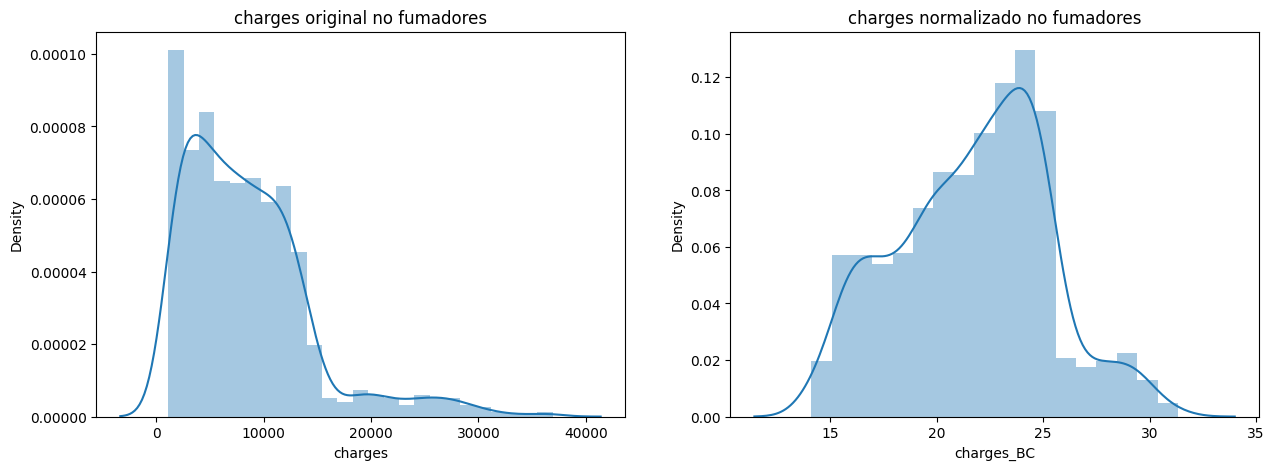

In [25]:
non_smoker_group['charges_BC'], lambda_ajustada = stats.boxcox(non_smoker_group['charges'])
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original no fumadores')
axes[1].set_title('charges normalizado no fumadores')

sns.distplot(non_smoker_group['charges'] ,ax = axes[0])
sns.distplot(non_smoker_group['charges_BC'], ax = axes[1]);

In [26]:
non_smoker_group

,age,sex,bmi,children,smoker,region,charges,charges_BC
1,18,male,33.770,1,no,southeast,1725.55230,15.698030
2,28,male,33.000,3,no,southeast,4449.46200,19.649803
3,33,male,22.705,0,no,northwest,21984.47061,28.049192
4,32,male,28.880,0,no,northwest,3866.85520,19.020947
5,31,female,25.740,0,no,southeast,3756.62160,18.893315
...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,24.307443
1333,50,male,30.970,3,no,northwest,10600.54830,23.913656
1334,18,female,31.920,0,no,northeast,2205.98080,16.658948
1335,18,female,36.850,0,no,southeast,1629.83350,15.480786


En este caso si que ha cambiado bastante, pero aun esta lejos de estar normalizada.

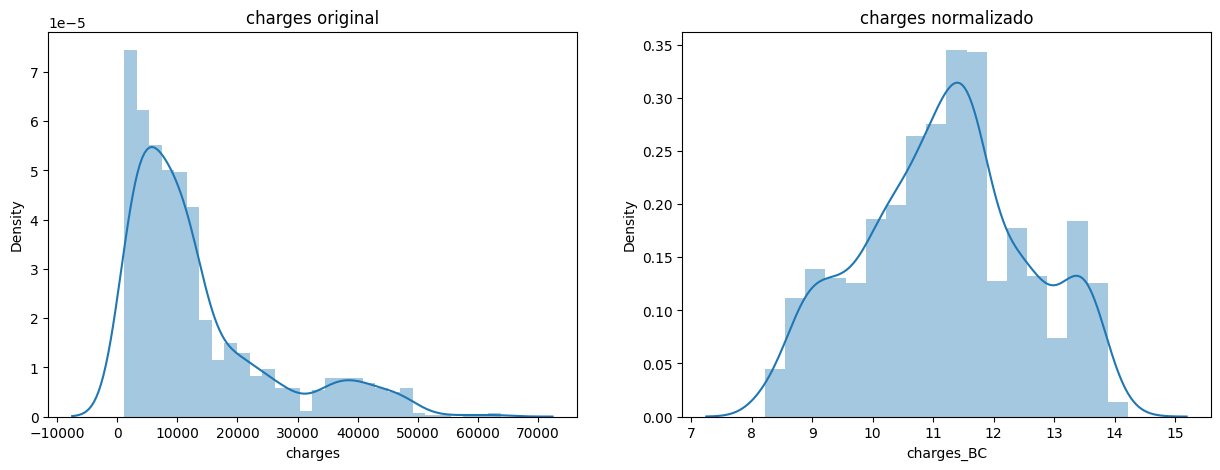

In [27]:
df['charges_BC'], lambda_ajustada = stats.boxcox(df['charges'])
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df['charges_BC'], ax = axes[1]);

Con el dataframe original tampoco se normaliza

Vamos a empezar con la estandarizacion. Usaremos robustscaler y lo haremos en los 3 dataframes

In [28]:
from sklearn.preprocessing import RobustScaler

In [29]:
num = df.select_dtypes(include = np.number)
num_col = num.columns.drop("charges")
robust = RobustScaler()
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(df[num_col])
# transformamos los datos
X_robust = robust.transform(df[num_col])
df2 = df.copy()
# por último convertiremos el array que nos devuelve en un dataframe. 

df2[num_col] = X_robust
df2.head()

,age,sex,bmi,children,smoker,region,charges,charges_BC
0,-0.833333,female,-0.297708,-0.5,yes,southwest,16884.92400,0.475094
1,-0.875000,male,0.401310,0.0,no,southeast,1725.55230,-1.302772
2,-0.458333,male,0.309616,1.0,no,southeast,4449.46200,-0.585858
3,-0.250000,male,-0.916344,-0.5,no,northwest,21984.47061,0.692467
4,-0.291667,male,-0.181006,-0.5,no,northwest,3866.85520,-0.693955


In [30]:
num = smoker_group.select_dtypes(include = np.number)
num_col = num.columns.drop("charges")
robust = RobustScaler()
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(smoker_group[num_col])
# transformamos los datos
X_robust = robust.transform(smoker_group[num_col])
smoker_group2 = smoker_group.copy()
# por último convertiremos el array que nos devuelve en un dataframe. 

smoker_group2[num_col] = X_robust
smoker_group2.head()

,age,sex,bmi,children,smoker,region,charges,charges_BC
0,-0.863636,female,-0.279446,-0.5,yes,southwest,16884.9240,-0.952423
11,1.090909,female,-0.456054,-0.5,yes,southeast,27808.7251,-0.324313
14,-0.500000,male,1.281503,-0.5,yes,southeast,39611.7577,0.231310
19,-0.363636,male,0.532291,-0.5,yes,southwest,36837.4670,0.108754
23,-0.181818,female,0.161525,0.0,yes,northeast,37701.8768,0.147399


In [31]:
num = non_smoker_group.select_dtypes(include = np.number)
num_col = num.columns.drop("charges")
robust = RobustScaler()
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(non_smoker_group[num_col])
# transformamos los datos
X_robust = robust.transform(non_smoker_group[num_col])
non_smoker_group2 = non_smoker_group.copy()
# por último convertiremos el array que nos devuelve en un dataframe. 

non_smoker_group2[num_col] = X_robust
non_smoker_group2.head()

,age,sex,bmi,children,smoker,region,charges,charges_BC
1,-0.871287,male,0.421134,0.0,no,southeast,1725.55230,-1.234769
2,-0.475248,male,0.326248,1.0,no,southeast,4449.46200,-0.464194
3,-0.277228,male,-0.942391,-0.5,no,northwest,21984.47061,1.173644
4,-0.316832,male,-0.181454,-0.5,no,northwest,3866.85520,-0.586817
5,-0.356436,female,-0.568392,-0.5,no,southeast,3756.62160,-0.611705


Vamos a hacer el encoding de las variables no numéricas.
Como hemos visto antes en los boxplots, smoker sería la única que si tendría orden, ya que los fumadores tienen más peso que los que no lo son

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
# lo aplicamos a todo nuestro dataframe 

for col in df2[["smoker", "region", "sex"]].columns:
    nuevo_nombre = col + "_encoded"
    df2[nuevo_nombre] = le.fit_transform(df2[col])

In [34]:
# chequeamos el dataframe de nuevo
df2.head()

,age,sex,bmi,children,smoker,region,charges,charges_BC,smoker_encoded,region_encoded,sex_encoded
0,-0.833333,female,-0.297708,-0.5,yes,southwest,16884.92400,0.475094,1,3,0
1,-0.875000,male,0.401310,0.0,no,southeast,1725.55230,-1.302772,0,2,1
2,-0.458333,male,0.309616,1.0,no,southeast,4449.46200,-0.585858,0,2,1
3,-0.250000,male,-0.916344,-0.5,no,northwest,21984.47061,0.692467,0,1,1
4,-0.291667,male,-0.181006,-0.5,no,northwest,3866.85520,-0.693955,0,1,1


In [35]:
for col in smoker_group2[["smoker", "region", "sex"]].columns:
    nuevo_nombre = col + "_encoded"
    smoker_group2[nuevo_nombre] = le.fit_transform(smoker_group2[col])
smoker_group2.head()

,age,sex,bmi,children,smoker,region,charges,charges_BC,smoker_encoded,region_encoded,sex_encoded
0,-0.863636,female,-0.279446,-0.5,yes,southwest,16884.9240,-0.952423,0,3,0
11,1.090909,female,-0.456054,-0.5,yes,southeast,27808.7251,-0.324313,0,2,0
14,-0.500000,male,1.281503,-0.5,yes,southeast,39611.7577,0.231310,0,2,1
19,-0.363636,male,0.532291,-0.5,yes,southwest,36837.4670,0.108754,0,3,1
23,-0.181818,female,0.161525,0.0,yes,northeast,37701.8768,0.147399,0,0,0


In [37]:
for col in non_smoker_group2[["smoker", "region", "sex"]].columns:
    nuevo_nombre = col + "_encoded"
    non_smoker_group2[nuevo_nombre] = le.fit_transform(non_smoker_group2[col])

non_smoker_group2.head()

,age,sex,bmi,children,smoker,region,charges,charges_BC,smoker_encoded,region_encoded,sex_encoded
1,-0.871287,male,0.421134,0.0,no,southeast,1725.55230,-1.234769,0,2,1
2,-0.475248,male,0.326248,1.0,no,southeast,4449.46200,-0.464194,0,2,1
3,-0.277228,male,-0.942391,-0.5,no,northwest,21984.47061,1.173644,0,1,1
4,-0.316832,male,-0.181454,-0.5,no,northwest,3866.85520,-0.586817,0,1,1
5,-0.356436,female,-0.568392,-0.5,no,southeast,3756.62160,-0.611705,0,2,0


In [38]:
df2.to_csv("insurance_prep.csv")
smoker_group2.to_csv("smokers_prep.csv")
non_smoker_group2.to_csv("non_smokers_prep.csv")


